# Wrangle and Analyze Data
This project aims to use Twitter data to create interesting and trustworthy analysis and visualizations. 


## Table of Contents
<ul>
<li><a href="#Intro"> Part I: Introduction</a></li>
 <ul>
    <a href="#Datasource">1. Data Sources</a>  
    <a href="#libraries"> 2. Frameworks and Libraries</a>
 </ul>
<li><a href="#T2">Part II: Data Wrangling</a></li>
<ul><a href="#T2_1">1. Data Gathering</a>  
    <a href="#T2_2">2. Data Assessing</a>  
    <a href="#T2_3">3. Data Cleaning</a>  
    <a href="#T2_4">4. Store</a>  
</ul>
<li><a href="#Summary">Part III: Analyze</a></li>
<ul><a href="#Visuals">1. Visualizations</a>  
    <a href="#Conclusions">2. Conclusions</a>
</ul>
</ul>

**** 

<a id='Intro'></a>
## Part I: Introduction
<a id='Datasource'></a>
### 1. Data Sources
1. `twitter_archive_enhanced.csv`:   
The WeRateDogs Twitter archive [twitter_archive_enhanced.csv](https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive-enhanced/twitter-archive-enhanced.csv)

2. `image_predictions.tsv`:  
The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (image_predictions.tsv) is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the [URL](https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv).

3. `tweet_json.txt`:   
Each tweet's retweet count and favorite ("like") count at minimum, and any additional data you find interesting. Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file. Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count. 

<a id='libraries'></a>
### 2. Frameworks and Libraries

In [926]:
import os
import pandas as pd
import numpy as np 
import requests 
import tweepy 
import json
import matplotlib.pyplot as plt 
import seaborn as sns
import re 
import configparser             
import pandas.api.types as ptypes   # test data type 
% matplotlib inline 

In [615]:
# The twitter text column contains long content so set the display to 100 to print long string
pd.set_option('max_colwidth',200)
pd.set_option('max_columns',50)

**** 

<a id='T2'></a>
## Part II: Data Wrangling
<a id='T2_1'></a>
### 1. Data Gathering
#### Steps:
1. Read local data `twitter_archive_enhanced.csv`.   
2. Access online `image_prediction.tsv` data using Requests library.   
3. Query Twitter API for `tweet_json.txt` data. 

#### 1.1  Read twitter_archive_enhanced data

In [385]:
df_twitter =  pd.read_csv(r'./Data/twitter-archive-enhanced.csv')
df_twitter.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None


#### 1.2 Read image_prediction data

In [4]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv' 

# get reponse 
response = requests.get(url)

# write to tsv file 
with open (r'./Data/image-prediction.tsv', mode ="wb") as file:
    file.write(response.content)

In [5]:
# read the tsv file into dataframe 
df_image = pd.read_csv(r'./Data/image-prediction.tsv', sep = '\t')
df_image.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


#### 1.3  tweet_json.txt from Twitter API

In [6]:
from config import consumer_key, consumer_secret, access_token, access_token_secret

# access the API 
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [7]:
# get the tweet IDs in the Twitter archive then query Twitter API for tweet's JSON data 
twitter_ids = df_twitter.tweet_id.unique().tolist()

In [8]:
# -----------Query Twitter API for JSON data 
# with open(r'./Data/tweet_json.txt',"w") as file: 
#     for ele in twitter_ids: 
#         print(f"Gather id: {ele}") 
#         try:
#             #get all the twitter status 
#             tweet = api.get_status(ele, tweet_mode = "extended")
#             #dump the json data to file
#             json.dump(tweet._json, file)
#             #add a linebreak after each dump
#             file.write('\n')
#         except Exception as e:
#             print(f"Error - id: {ele}" + str(e))

In [177]:
json_api = []

with open(r'./Data/tweet_json.txt', "r") as file:
    for line in file:
        try:
            tweet = json.loads(line)
            json_api.append({
                "tweet_id" : tweet["id"], 
                "retweet_count": tweet["retweet_count"],
                "favorite_count": tweet["favorite_count"],
                "retweeted": tweet["retweeted"],
                "display_text_range": tweet["display_text_range"]  
            })
        except:
            print("Content Error")
df_api = pd.DataFrame(json_api, columns = \
                      ["tweet_id", "retweet_count", "favorite_count", "retweeted", "display_text_range"])
df_api.head()

,tweet_id,retweet_count,favorite_count,retweeted,display_text_range
0,892420643555336193,7659,35988,False,"[0, 85]"
1,892177421306343426,5661,31062,False,"[0, 138]"
2,891815181378084864,3754,23370,False,"[0, 121]"
3,891689557279858688,7817,39263,False,"[0, 79]"
4,891327558926688256,8423,37504,False,"[0, 138]"


<a id='T2_2'></a>
### 2. Data Assessing
This section aims to visually and programmatically assess the data for `quality` and `tidiness` issues. 

#### 2.1 Detect for issues 
**df_twitter**

In [87]:
# HTML code in source column 
# incorrect datetype of Timestamp column 
df_twitter.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [88]:
# Found that incorrect datetype of Timestamp column 
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [90]:
# Text other than name in Name column
df_twitter.name.value_counts()

None         745
a             55
Charlie       12
Lucy          11
Oliver        11
Cooper        11
Penny         10
Tucker        10
Lola          10
Bo             9
Winston        9
the            8
Sadie          8
Buddy          7
Bailey         7
Daisy          7
Toby           7
an             7
Jax            6
Jack           6
Bella          6
Oscar          6
Stanley        6
Milo           6
Scout          6
Koda           6
Leo            6
Dave           6
Rusty          6
George         5
            ... 
Dido           1
Olaf           1
Pete           1
Jessiga        1
Mary           1
Lolo           1
Smiley         1
Jennifur       1
Jazz           1
Bauer          1
Hermione       1
Dotsy          1
Cal            1
Scruffers      1
Damon          1
Jeb            1
Gustav         1
William        1
Bode           1
Rodman         1
Odin           1
Rizzo          1
Wishes         1
Alexander      1
Petrick        1
Willow         1
Aubie          1
Buckley       

In [81]:
# Unclassified Dogs
df_twitter\
          .query('((doggo == "None") and (floofer == "None") and (pupper == "None") and (puppo == "None"))')\
          .shape[0]

1976

In [107]:
# some ratings in rating_numerator and rating_demonirator are out of range 
print("Check Rating_numerator:",'\n',df_twitter.rating_numerator.value_counts().sort_index(ascending= False))
print('\n',"Check Rating_demonirator:",'\n',df_twitter.rating_denominator.value_counts().sort_index(ascending= False))

Check Rating_numerator: 
 1776      1
960       1
666       1
420       2
204       1
182       1
165       1
144       1
143       1
121       1
99        1
88        1
84        1
80        1
75        2
60        1
50        1
45        1
44        1
27        1
26        1
24        1
20        1
17        1
15        2
14       54
13      351
12      558
11      464
10      461
9       158
8       102
7        55
6        32
5        37
4        17
3        19
2         9
1         9
0         2
Name: rating_numerator, dtype: int64

 Check Rating_demonirator: 
 170       1
150       1
130       1
120       1
110       1
90        1
80        2
70        1
50        3
40        1
20        2
16        1
15        1
11        3
10     2333
7         1
2         1
0         1
Name: rating_denominator, dtype: int64


In [667]:
# Incorrect data extraction from df_twitter dataframe for example
df_master.query( 'rating_denominator == 10 and rating_numerator == 75')[['text','rating_denominator','rating_numerator']]

,text,rating_denominator,rating_numerator
695,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",10,75


**df_image**

In [182]:
# Multiple data format (upper and lower cases) in column p1 p2 and p3
# Some records show pictures are not dogs 
df_image.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2028,882627270321602560,https://pbs.twimg.com/media/DD-40X3WAAAJPU5.jpg,1,Pembroke,0.542982,True,Chihuahua,0.251988,True,Cardigan,0.107699,True
1533,789986466051088384,https://pbs.twimg.com/media/CvaYgDOWgAEfjls.jpg,1,tub,0.479477,False,bathtub,0.325106,False,golden_retriever,0.078530,True
340,672248013293752320,https://pbs.twimg.com/media/CVROAIfWsAECA5t.jpg,1,Irish_terrier,0.413173,True,Airedale,0.335616,True,toy_poodle,0.027952,True
189,669375718304980992,https://pbs.twimg.com/media/CUoZqaqWcAAA2MQ.jpg,1,Airedale,0.168762,True,Norfolk_terrier,0.107479,True,Lakeland_terrier,0.097846,True
324,671879137494245376,https://pbs.twimg.com/media/CVL-goTWoAEUfhy.jpg,1,bee_eater,0.302648,False,toucan,0.219646,False,chickadee,0.156687,False
1779,828409743546925057,https://pbs.twimg.com/media/C38aQYgXAAMY2Wh.jpg,1,teddy,0.908457,False,toy_poodle,0.018040,True,standard_poodle,0.012667,True
382,673320132811366400,https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg,3,Samoyed,0.978833,True,Pomeranian,0.012763,True,Eskimo_dog,0.001853,True
1517,787322443945877504,https://pbs.twimg.com/media/Cu0hlfwWYAEdnXO.jpg,1,seat_belt,0.747739,False,golden_retriever,0.105703,True,dingo,0.017257,False
1823,834931633769889797,https://pbs.twimg.com/media/C5ZF4p-XEAEmApg.jpg,1,ice_bear,0.330573,False,soft-coated_wheaten_terrier,0.196476,True,Irish_terrier,0.073097,True
758,688789766343622656,https://pbs.twimg.com/media/CY8SocAWsAARuyh.jpg,1,American_Staffordshire_terrier,0.599660,True,Staffordshire_bullterrier,0.380976,True,bull_mastiff,0.003889,True


In [148]:
# contains retweets which some tweets from same jpg_url
df_image.groupby('jpg_url')['jpg_url'].count().sort_values(ascending = False)

jpg_url
https://pbs.twimg.com/media/Crwxb5yWgAAX5P_.jpg                                            2
https://pbs.twimg.com/media/CtVAvX-WIAAcGTf.jpg                                            2
https://pbs.twimg.com/media/CvaYgDOWgAEfjls.jpg                                            2
https://pbs.twimg.com/media/C3nygbBWQAAjwcW.jpg                                            2
https://pbs.twimg.com/media/CvT6IV6WEAQhhV5.jpg                                            2
https://pbs.twimg.com/media/CVuQ2LeUsAAIe3s.jpg                                            2
https://pbs.twimg.com/media/CvJCabcWgAIoUxW.jpg                                            2
https://pbs.twimg.com/media/Cp6db4-XYAAMmqL.jpg                                            2
https://pbs.twimg.com/media/C4KHj-nWQAA3poV.jpg                                            2
https://pbs.twimg.com/media/CpmyNumW8AAAJGj.jpg                                            2
https://pbs.twimg.com/media/CuRDF-XWcAIZSer.jpg               

**df_api**

In [178]:
df_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 5 columns):
tweet_id              2331 non-null int64
retweet_count         2331 non-null int64
favorite_count        2331 non-null int64
retweeted             2331 non-null bool
display_text_range    2331 non-null object
dtypes: bool(1), int64(3), object(1)
memory usage: 75.2+ KB


In [179]:
# list object in display_text_range column 
df_api.head()

,tweet_id,retweet_count,favorite_count,retweeted,display_text_range
0,892420643555336193,7659,35988,False,"[0, 85]"
1,892177421306343426,5661,31062,False,"[0, 138]"
2,891815181378084864,3754,23370,False,"[0, 121]"
3,891689557279858688,7817,39263,False,"[0, 79]"
4,891327558926688256,8423,37504,False,"[0, 138]"


#### 2.2 Assessing Summary
* **Quality**   

    *`df_twiteer`* table:
        - Erroneous datatype (timestamp string)    
        - The Source column contains HTML code 
        - Incorret lower case words in Name column 
        - Some of the dogs are not classified (doggo, floofer, pupper, or puppo)
        - Some of the ratings in both rating_numerator and rating_denomirator are out of range 
        
    *`df_image`* table:
        - Contain retweets duplicated content from column jpg_url   
        - Multiple data format (upper and lower cases) in column p1 p2 and p3  
        - Some records show pictures are not dogs    
    *`df_api`* table:
        - List object in display_text_range column  
        
* **Tidiness** 

    *`df_twiteer`* table:
        - Columns doggo, floofer, pupper,and puppo should in one column as they present same attribute information  
         
    *`df_image`* table:
        - Prediction Algorithm results p1 - p3 can be reduced in one dimension 
    *`df_api`* table:
        - display_text_range column contains min and max information in one column

<a id='T2_3'></a>
### 3. Data Cleaning
#### 3.1 Define Cleaning steps:  
1. Merge three tables 

1. Change the datatype of Timestamp to datetime
1. Extract HTML code in Source column  
2. Remove incorrect text in Name column
4. Merge doggo, floofer, pupper, and puppo in one column 
6. Remove records which in_reply_to_status_id and retweeted_status_id is not null, dont contain images or images dont display dogs
7. Convert the data format for columns p1 to p3 into same lower case format 
5. Clean the ratings 
9. Reduce the prediction columns into two dimension:  Breed and conf 
1. Extract the min and max display text from display_text_range column 
11. Change datetype of "retweet_count", "favorite_count", "img_num" to int


#### 3.2 Cleaning process:
**df_master**
    1. Merge three tables 

In [827]:
# Merge three tables
df_merged = df_twitter.merge(df_image, how= 'outer', on='tweet_id')\
                    .merge(df_api, how='outer', on='tweet_id') 

# Make a copy of merged dataframe 
df_master = df_merged.copy() 

df_master.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,retweeted,display_text_range
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,7659.0,35988.0,False,"[0, 85]"
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,5661.0,31062.0,False,"[0, 138]"


    2. Change the datatype of Timestamp to datetime

In [828]:
# 1. Change the datatype of Timestamp to datetime
df_master['timestamp'] = pd.to_datetime(df_master['timestamp'])

In [829]:
# Test datatype convertion
assert ptypes.is_datetime64_any_dtype(df_master['timestamp'])

    3. Remove HTML code from source column  

In [830]:
# Origional Content in source column, need to keep only "Twitter for iPhone"
df_master.source[0]

'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'

In [831]:
df_master.source = df_master.source.str.extract(">(.+)</a>")

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


In [832]:
# Cleaned Source column contains "Upper and lower Alphabet", "Space", and "-".  
df_master.source.unique()

array(['Twitter for iPhone', 'Twitter Web Client', 'Vine - Make a Scene',
       'TweetDeck'], dtype=object)

In [833]:
# Establish expected pattern for content in Source column 
source_pattern = re.compile("^[a-zA-Z -]*$")

# Test for every records in source column 
for string_ele in df_master.source:
    assert bool(source_pattern.match(string_ele)) == True

    4. Remove incorrect text in Name column

In [834]:
# lower case text in Name column are not name
wrong_name = df_master.loc[df_master.name.str.islower(),'name'].unique().tolist()

# Replace the name of wrong name to None 
df_master.loc[df_master.name.isin(wrong_name),'name'] = "None"

In [835]:
# Test if the lower case words been renamed to "None" in Name column 
assert df_master.name.str.islower().all() == False

    5. Merge doggo, floofer, pupper, and puppo in one column

In [836]:
# Concatenate type information from doggo, floofer, pupper, and puppo columns 
df_master['dog_type'] = df_master.doggo +" "+ df_master.floofer +" "+ df_master.pupper +" "+ df_master.puppo

# clean out the None type and keep only the useful type information
df_master['dog_type'] = df_master['dog_type'].apply(lambda x: ''.join(x.split("None")).strip())

# Check the new created dog_type and found that some dogs have been classified to two types e.g doggo+puppo 
df_master['dog_type'].unique()

array(['', 'doggo', 'puppo', 'pupper', 'floofer', 'doggo   puppo',
       'doggo floofer', 'doggo  pupper'], dtype=object)

In [837]:
# Print out all the wrong classification
df_master.query('(dog_type =="doggo   puppo") or (dog_type =="doggo floofer")\
                or (dog_type =="doggo  pupper") ')[["text", "dog_type"]]

,text,dog_type
191,Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel,doggo puppo
200,"At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk",doggo floofer
460,"This is Dido. She's playing the lead role in ""Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple."" 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7",doggo pupper
531,Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho,doggo pupper
565,"Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze",doggo pupper
575,This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj,doggo pupper
705,This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd,doggo pupper
733,"Pupper butt 1, Doggo 0. Both 12/10 https://t.co/WQvcPEpH2u",doggo pupper
778,"RT @dog_rates: Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda",doggo pupper
822,RT @dog_rates: This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC,doggo pupper


In [838]:
# Visually read the text and fix the dog_type 
df_master.loc[191, "dog_type"] = "puppo"
df_master.loc[200, "dog_type"] = "floofer"
df_master.loc[460, "dog_type"] = "pupper"
df_master.loc[531, "dog_type"] = ''
df_master.loc[565, "dog_type"] = ''
df_master.loc[575, "dog_type"] = "pupper"
df_master.loc[705, "dog_type"] = "doggo"
df_master.loc[733, "dog_type"] = ''
df_master.loc[778, "dog_type"] = ''
df_master.loc[822, "dog_type"] = ''
df_master.loc[889, "dog_type"] = ''
df_master.loc[956, "dog_type"] = ''
df_master.loc[1063, "dog_type"] = ''
df_master.loc[1113, "dog_type"] = ''
df_master.loc[df_master.dog_type.apply(lambda x: x== ''), 'dog_type'] = 'none'

In [839]:
# Test if the dog can only be classified to 1 type 
expected_dog_types = ['none', 'doggo', 'puppo', 'pupper', 'floofer']
assert (df_master['dog_type'].unique()== expected_dog_types).all() == True

# Drop unneeded columns 
df_master.drop(["doggo", "puppo", "pupper", "floofer"] , inplace = True, axis =1)

    6.  Remove tweets which in_reply_to_status_id and retweeted_status_id is not null, and pictures do not show dogs

In [840]:
# keep only records without retweeted_status_id or in_reply_to_status_id
df_master = df_master[(df_master["retweeted_status_id"].isnull())]
df_master = df_master[(df_master["in_reply_to_status_id"].isnull())]

# Drop records based on retweeted column
df_master.dropna(subset = ["retweeted"], inplace = True)
df_master.shape

(2090, 29)

In [841]:
# Drop records which without images
df_master.dropna(subset = ["jpg_url"], inplace = True)

In [842]:
# Test if there are still duplicated images after dropping the replies and the retweets
assert sum(df_master.jpg_url.duplicated()) ==0 

# Drop unneeded columns 
df_master.drop(["in_reply_to_status_id", "in_reply_to_user_id",
                 "retweeted_status_id", "retweeted_status_user_id", 
                 "retweeted_status_timestamp", "retweeted"] , inplace = True, axis =1)

    7. Convert the data format for columns p1 to p3 into same lower case format

In [843]:
# change p1 to p3 to lower case 
df_master.p1 = df_master.p1.str.lower()
df_master.p2 = df_master.p2.str.lower()
df_master.p3 = df_master.p3.str.lower()

In [844]:
# test if p1,p2, and p3
assert (df_master.p1.str.islower().all() 
      & df_master.p2.str.islower().all() 
      & df_master.p3.str.islower().all())   == True

    8. Clean ratings

In [845]:
# Keep ratings with rating_denominator ==10 since it captures most of the cases 
print(df_master.rating_denominator.value_counts())

df_master = df_master.query('rating_denominator ==10')

10     1947
50        3
80        2
11        2
170       1
150       1
120       1
110       1
90        1
70        1
40        1
20        1
7         1
2         1
Name: rating_denominator, dtype: int64


In [846]:
# We found that the rating_numerator was extracted wrongly by missing the decimal point 
df_master.query( 'rating_denominator ==10')[['text','rating_denominator', 'rating_numerator' ]]\
         .sort_values(by='rating_numerator', ascending = False)

,text,rating_denominator,rating_numerator
979,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,10,1776
2074,After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY,10,420
695,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",10,75
763,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,10,27
1712,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,10,26
758,RIP Loki. Thank you for the good times. You will be missed by many. 14/10 https://t.co/gJKD9pst5A,10,14
56,Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF,10,14
426,This is Sundance. He's a doggo drummer. Even sings a bit on the side. 14/10 entertained af (vid by @sweetsundance) https://t.co/Xn5AQtiqzG,10,14
199,Sometimes you guys remind me just how impactful a pupper can be. Cooper will be remembered as a good boy by so many. 14/10 rest easy friend https://t.co/oBL7LEJEzR,10,14
339,Say hello to Smiley. He's a blind therapy doggo having a h*ckin blast high steppin around in the snow. 14/10 would follow anywhere https://t.co/SHAb1wHjMz,10,14


In [847]:
# Fix the missing decimal point issues and remove the two records with extreme numerator scores 
df_master.loc[695,'rating_numerator'] =9.75
df_master.loc[763,'rating_numerator'] = 11.27
df_master.loc[1712,'rating_numerator'] = 11.26

# keep the rating_numrator upper bound to 14 to exclude the outliers
df_master = df_master.query('rating_numerator <=14')

In [848]:
# Test for cleaning results 
assert (df_master.rating_denominator.nunique() ==1 ) and (df_master.rating_numerator.max() ==14)

    9. Reduce the prediction columns into two dimension:  Breed and conf 

In [849]:
# Iterrate each rows and extract the information by the algorithm hierarchical order
breed = [] 
conf = [] 
for idx, row in df_master.iterrows():
    if row['p1_dog'] == True:
        breed.append(row['p1'])
        conf.append(row['p1_conf'])
        continue 
    if row['p2_dog']  == True:
        breed.append(row['p2'])
        conf.append(row['p2_conf'])
        continue       
    if row['p3_dog']  == True:
        breed.append(row['p3'])
        conf.append(row['p3_conf'])
    else: 
        breed.append('not-a-dog')
        conf.append(np.nan)

# Add the new columns to df_master 
df_master['predict_breed'] = breed
df_master['predict_conf'] = conf

In [853]:
# Test
assert all(df_master.query('p1_dog== False and p2_dog== False and p3_dog == False').predict_breed == 'not-a-dog')
assert all(df_master.query('p1_dog== False and p2_dog== False and p3_dog == False').predict_conf.isnull())

# Drop unneeded columns 
df_master.drop(['p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf','p3_dog',
               'expanded_urls'],\
                inplace = True, axis = 1)

      10. Extract the min and max display text from display_text_range column

In [856]:
# Extract the text range start and end from display range column 
df_master['range_start'], df_master['range_end'] = df_master.display_text_range.apply(lambda x: x[0]), \
                                               df_master.display_text_range.apply(lambda x: x[1])

In [858]:
# Test for both columns for is fully contain information
assert df_master[['range_start','range_end']].isnull().sum().all() ==0

df_master.drop(['display_text_range'],inplace = True, axis = 1)

    11. Change datetype of "retweet_count", "favorite_count", "img_num" to int

In [860]:
# Change the columns in list to int type
convert_2_int = ["retweet_count", "favorite_count", "img_num"]
for col in convert_2_int:
    df_master[col] = df_master[col].astype("int64")
# Test datatype convertion    
assert all(ptypes.is_numeric_dtype(df_master[col]) for col in convert_2_int)

<a id='T2_4'></a>
### 4. Store

In [864]:
# Store the clean dataframe in a CSV file named twitter_archive_master.csv.
df_master.to_csv(r'./Data/twitter_archive_master.csv', index = False)

**** 
<a id='Summary'></a>
## Part III: Analyze
**Questions**:  
2. Which breed of dog is most popular overall based on the rating and number of retweets? 
3. Is there a correlaion between count of retweets and count of of favorite? 
4. Is there a pattern visible in the timing of the tweets? 

In [867]:
# Read from cleaned dataset
df_archive_raw = pd.read_csv(r'./Data/twitter_archive_master.csv')

In [ ]:
# Make a copy of origioal dataset 
df = df_archive_raw.copy()

<a id='Visuals'></a>
### Analysis and Visualizations
2. Which breed of dog is most popular overall based on the rating and number of retweets? 

In [963]:
# Group the dogs by algorithm predict breeds and get the total tweets, average retweet_count and favorite count for visulization 
df_popular_group = df.groupby('predict_breed')\
                      .agg({'tweet_id':'count','retweet_count': 'mean', 'favorite_count': 'mean'})\
                      .reset_index()\
                      .rename(columns = {'tweet_id':'tweet_count', \
                                         'retweet_count': 'avg_retweet_count',\
                                         'favorite_count': 'avg_favorite_count'})\
                      .query('predict_breed != "not-a-dog"')\
                      .sort_values(by ='tweet_count', ascending = False)

df_popular_group['sum_retweet_favorite'] = (df_popular_group.avg_retweet_count + df_popular_group.avg_favorite_count)/2

In [964]:
df_popular_group.sum_retweet_favorite = round(df_popular_group.sum_retweet_favorite)

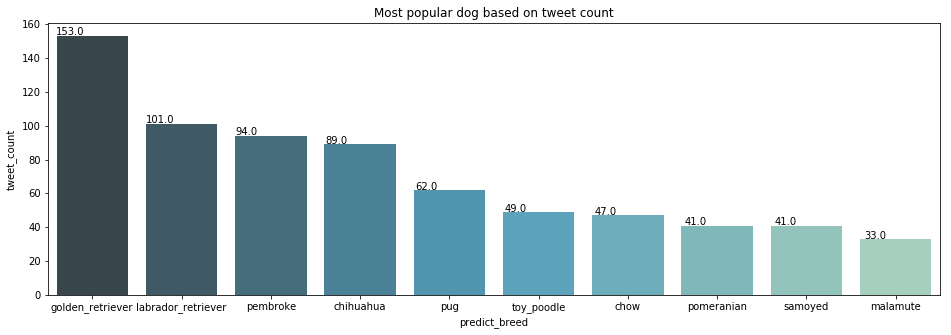

In [965]:
# most popular dogs based on the tweets count
fig, ax = plt.subplots(figsize = (16,5))
ax = sns.barplot(x = "predict_breed", y = "tweet_count", data = df_popular_group.iloc[:10,:], palette = "GnBu_d")
ax.set_title("Most popular dog based on tweet count")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005));

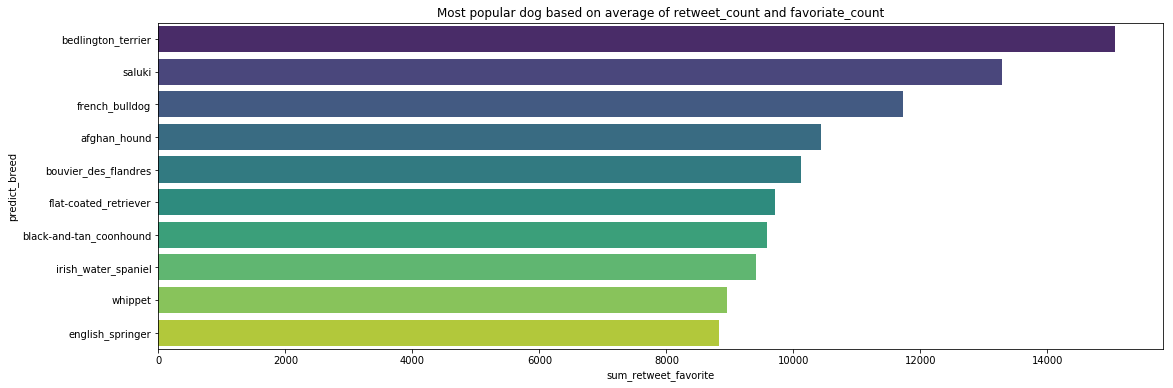

In [969]:
# most popular dogs based on the average of average retweet_count and average of favoriate_count
fig, ax = plt.subplots(figsize = (18,6))
ax = sns.barplot( x = "sum_retweet_favorite",y = "predict_breed", \
                data = df_popular_group.sort_values(by='sum_retweet_favorite', ascending= False).iloc[:10,:],\
                palette = "viridis")
ax.set_title("Most popular dog based on average of retweet_count and favoriate_count");

**Insight 1:**   
We found that the list of popular breed based on **retweet count** doesnt quite overlap with the list of popular breed based on the **average of retweet_count and favoriate_count**.    

    2. Is there a correlaion between count of retweets and count of of favorite?

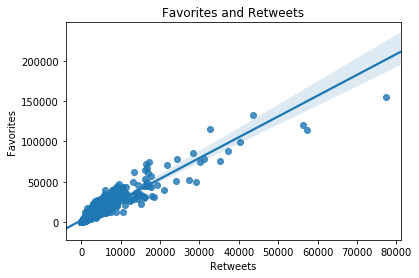

In [976]:
# get a scatter plot and add a regression line 
graph = sns.regplot(x=df.retweet_count, y=df.favorite_count)
plt.title("Favorites and Retweets")
plt.xlabel('Retweets')
plt.ylabel('Favorites')
# sns.plt.show()
fig = graph.get_figure()

**Insight 2:**  
It seems like Retweets and Favorites are highly correlated and the above plot. The count of facoriates sync positively with the count of retweets.

    3. Is there a pattern visible in the timing of the tweets?

In [1030]:
# retrieve the hour time information from post 
df['hour'] = df.timestamp.str[10:13].astype(int)

# cut the hour into 4 hour bins
label_bins = [(x, x+4) for x in range(0,24,4)]
cut_bins = [x for x in range(-1,24,4)]

df['hour_bins'] = pd.cut(df['hour'], bins= cut_bins, labels= label_bins)

In [1040]:
df_hour = df.groupby('hour_bins')['tweet_id'].count().reset_index().rename(columns ={'tweet_id':'count_tweet'})

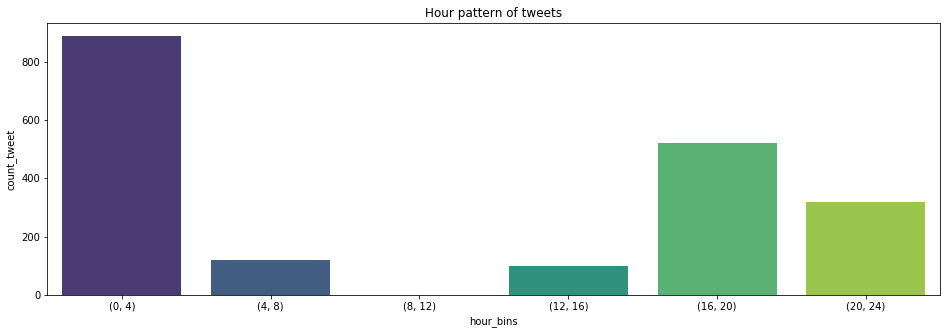

In [1044]:
fig, ax = plt.subplots(figsize = (16,5))
ax = sns.barplot(x = "hour_bins",\
                   y = "count_tweet", data = df_hour,  palette = "viridis")
ax.set_title("Hour pattern of tweets");


**Insight 3:**
As we can see in he graph, the most posts are during the midnight between 0-4 o'clock, followed by 16 - 20 o'clock.

<a id='Conclusions'></a>
### Conclusions
In this project we went through a whole data wrangling process. The gathering included the programmatical, manual download as also the gathering via an API. Also the cleaning part covered a lot of techniques like regular expressions or the overall handling of dataframes.